# Data Preparation

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv ('train_house.csv', index_col=0)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Drop variabel NaN
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
missing_data.head(20)

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [ ]:
# Memisahkan data menjadi numerikal & kategorikal
num_cols = house._get_numeric_data().columns
house_numeric= house[num_cols]
house_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
house_categorical = house.drop (num_cols, axis=1)
house_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# 1D Visualization

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual`

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut

       AllPub	All public Utilities (E,G,W,& S)
       NoSeWa	Electricity and Gas Only

Text(0.5, 1.0, 'Utilities')

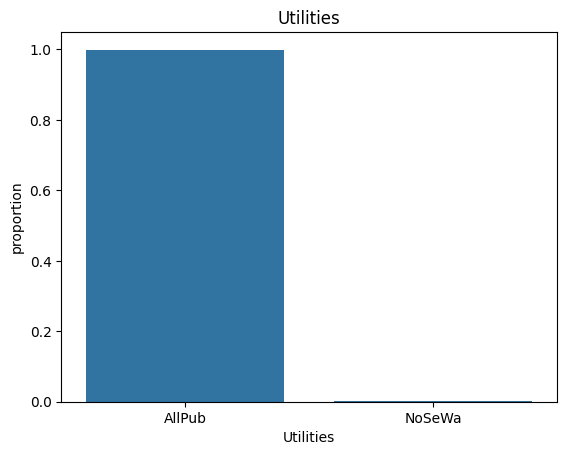

In [ ]:
### Tulis kode Anda di sini
sns.barplot(x=house['Utilities'].value_counts().index,
            y=house['Utilities'].value_counts(normalize = True))
plt.title('Utilities')

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

Text(0.5, 1.0, 'HouseStyle')

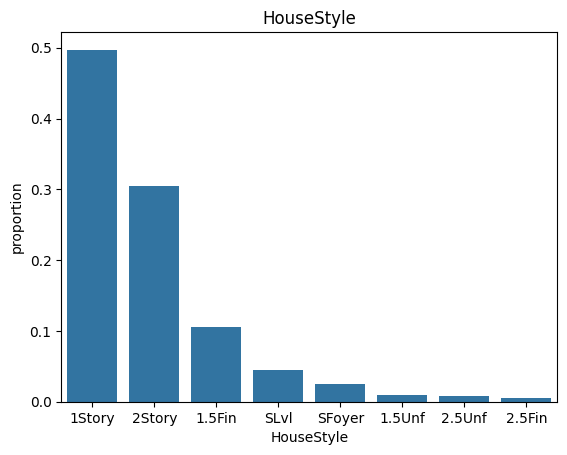

In [ ]:
### Tulis kode Anda di sini
sns.barplot(x=house['HouseStyle'].value_counts().index,
            y=house['HouseStyle'].value_counts(normalize = True))
plt.title('HouseStyle')

### ExterQual

ExterQual: Kualitas material eksterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

Text(0.5, 1.0, 'ExterQual')

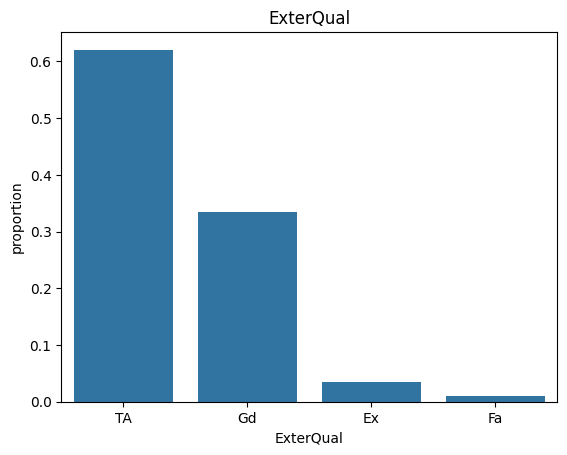

In [ ]:
### Tulis kode Anda di sini
sns.barplot(x=house['ExterQual'].value_counts().index,
            y=house['ExterQual'].value_counts(normalize = True))
plt.title('ExterQual')

# **Analisis tentang variabel kategorikal**

* Dari variabel kategorikal Utilities fasilitas pada properti yang all publik lebih banyak diminati.
* Pada variabel Kategorikal Housestyle dengan 1story menjadi style yang paling banyak disukai orang lalu disusul oleh 2story.
* kualitas material dengan bahan khas menjadi hal yang paling banyak diminati.



              1. Mengapa style properti 2.5fin paling rendah peminatnya?
              2. Mengapa pembeli lebih menyukai meterial dengan bahas khas daripada bahan terbaik?

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

Median: 0.0
Mean: 2.920957215373459
Std Dev: 41.33554492872656


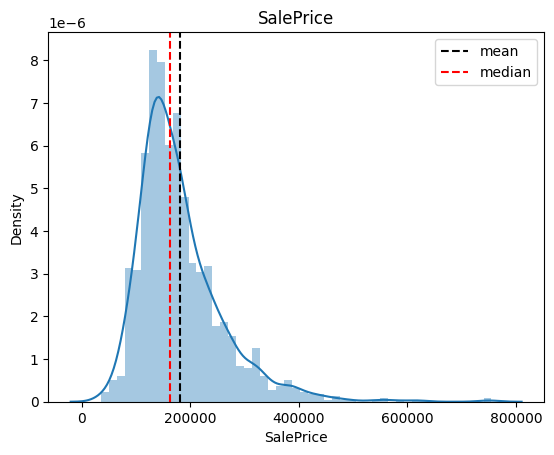

In [ ]:
house = house_numeric["SalePrice"]
sns.distplot(house, axlabel=house.name)
line1 = plt.axvline(house.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(house), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.title("SalePrice")
plt.show()

#### **Analisis tentang variabel `SalePrice`**
* Harga penjualan rumah rata-rata berada pada angka 100.000 dan 200.000. Dengan harga penjualan seperti itu termasuk sangat mahal atau tidak?

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

Median: 0.0
Mean: 2.920957215373459
Std Dev: 41.33554492872656


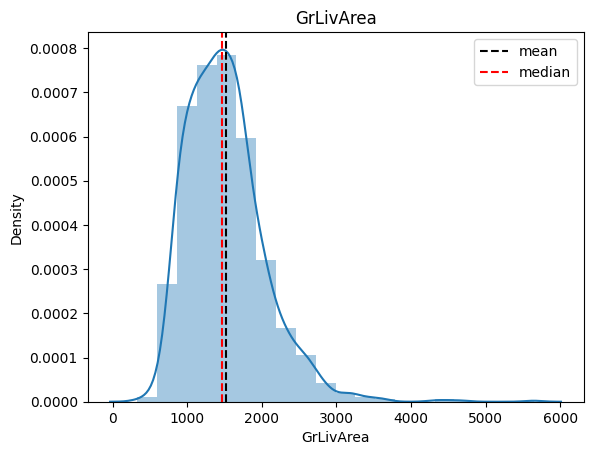

In [ ]:
house = house_numeric["GrLivArea"][house_numeric["GrLivArea"] !=0]
sns.distplot(house, axlabel=house.name, bins = 20)
line1 = plt.axvline(house.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(house), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.title("GrLivArea")
plt.show()

#### **Analisis tentang variabel `GrlivArea`**

* Luas rata-rata tanah yang dapat di jadikan rumah berada pada angka 1000 sampai 2000. Dengan angka luas tanah yang dapat ditinggalin seperti itu apa itu termasuk sangat luas atau tidak?

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

In [ ]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev

Median: 0.0
Mean: 2.920957215373459
Std Dev: 41.33554492872656


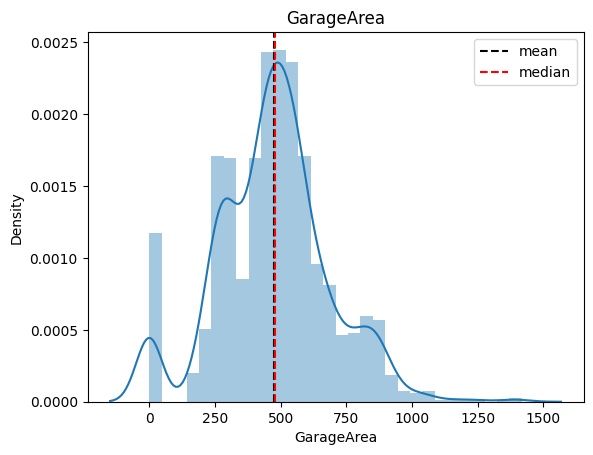

In [ ]:
house = house_numeric["GarageArea"]
sns.distplot(house, axlabel=house.name, bins = 30)
line1 = plt.axvline(house.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(house), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.title('GarageArea')
plt.show()

#### **Analisis tentang variabel `GarageArea`**

* Jika sebuah rumah memiliki area garasi rata-rata pada angka 250 dan 750. Apakah dengan area garasi pada sebuah rumah dengan angka tersebut merupakan sangat kecil?

## Pemrosesan Data Variabel Numerikal

Median: 0.0
Mean: 2.920957215373459
Std Dev: 41.33554492872656


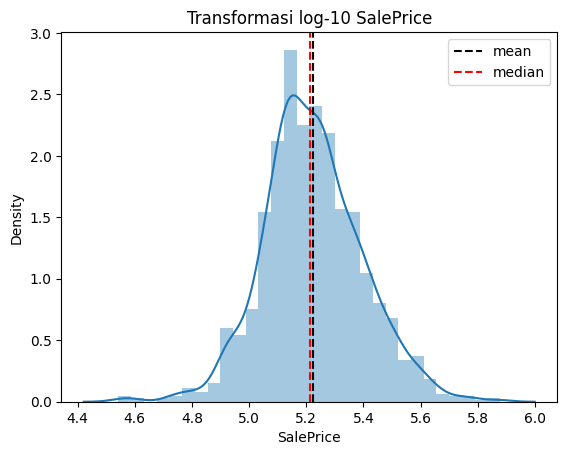

In [ ]:
# Transformasi log-10 SalePrice

house = np.log10(house_numeric["SalePrice"])
sns.distplot(house, axlabel=house.name, bins = 30)
line1 = plt.axvline(house.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(house), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.title('Transformasi log-10 SalePrice')
plt.show()

Median : 1464.0
Mean : 1515.463698630137
Standard Deviation : 525.4803834232025


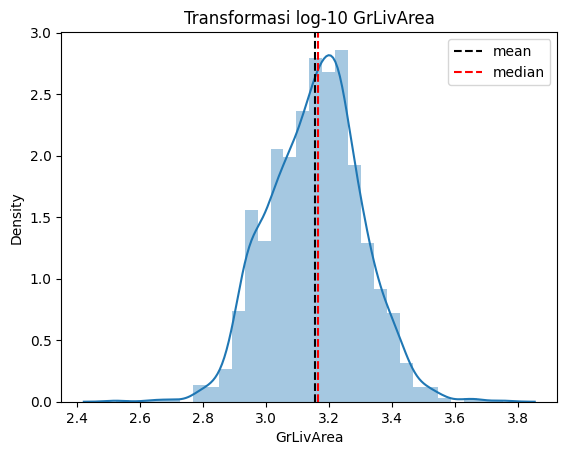

In [ ]:
# Transformasi log-10 GrLivArea

house = np.log10(house_numeric["GrLivArea"])
sns.distplot(house, axlabel=house.name, bins = 30)
line1 = plt.axvline(house.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(house), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print('Median :', stats.median(house_numeric['GrLivArea']))
print('Mean :', stats.mean(house_numeric['GrLivArea']))
print('Standard Deviation :', stats.stdev(house_numeric['GrLivArea']))
plt.title('Transformasi log-10 GrLivArea')
plt.show()

Median: 0.0
Mean: 2.920957215373459
Std Dev: 41.33554492872656


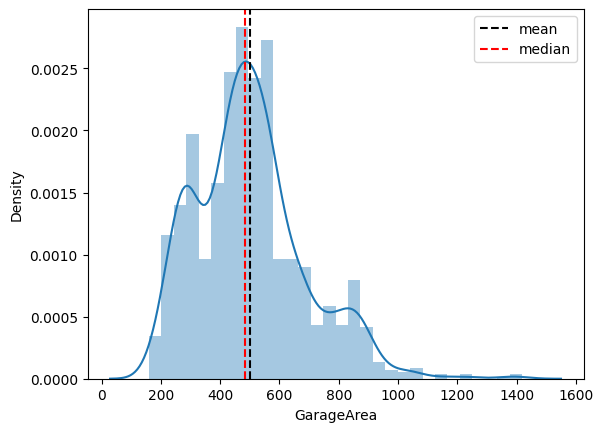

In [ ]:
# Menghilangkan nilai nol pada GarageArea
house = house_numeric["GarageArea"][house_numeric["GarageArea"] > 0]
sns.distplot(house, axlabel=house.name, bins = 30)
line1 = plt.axvline(house.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(house), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### **Penjelasan dan analisis tentang pemrosesan data**

* Setelah dilakukan distribusi pemprosesan data dapat dilihat telah menjadi normal, kecuali pada bagian GrLivArea menujukkan penurunan rata-rata pada luas tanah.

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

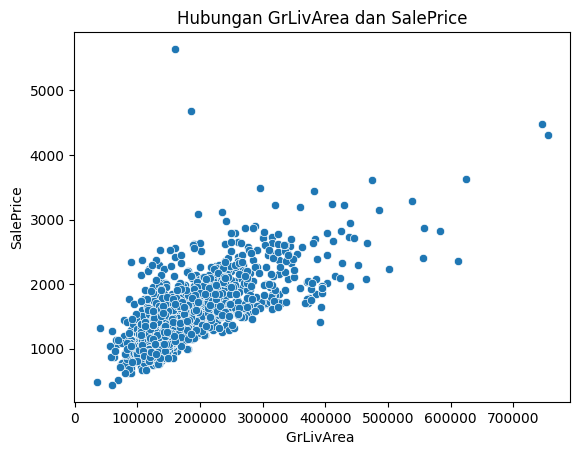

In [ ]:
sns.scatterplot(y="GrLivArea", x="SalePrice", data=house)
plt.title('Hubungan GrLivArea dan SalePrice')
plt.xlabel('GrLivArea ')
plt.ylabel('SalePrice')
plt.show()

# `GarageArea` dengan `SalePrice`

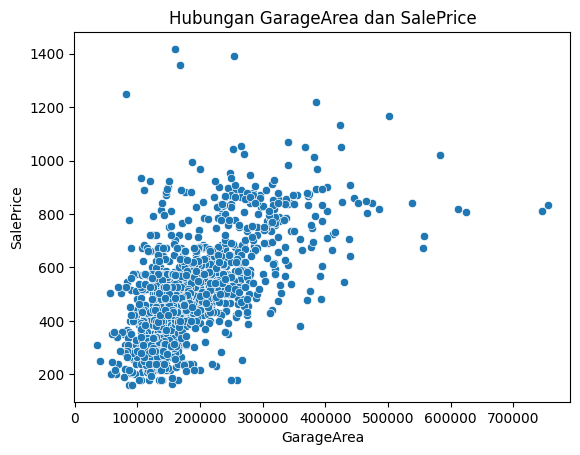

In [ ]:
sns.scatterplot(y="GarageArea", x="SalePrice", data=house)
plt.title('Hubungan GarageArea dan SalePrice')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

#### **Hipotesis tentang hubungan antar-variabel**

* Dari visualisasi GrLivArea dengan SalePrice tersebut bisa disimpulkan bersifat positif meskipun ada kemungkinan sedikit adanya gangguan atau anomali yang terjadi
* Visualisasi antara GarageArea dengan SalePrice menujukkan hubungan positif meskipun ada beberapa yang tidak memiliki area garasi dan adanya sedikit kemungkinan anomali